# End to end Multi-class Dog Breed Classification

## 1. Problem
Indentifying the breed of a dog an image of dog

## 2. Data

https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation

A file with prediction probalibities for each dog breed of each test image.

## 4. Features

Some information about the data:
* images (unstructed data)
* There are 120 breeds of dogs (this means there are 120 different classes)
* There are around 10,000+ images in the training set
(these images have labels)
* There are around 10,000+ images in the test set
(These images have no labels, because we want to predict them)

In [6]:
#Unzip uploaded data into Google Drive
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)

# Check for GPU avalibity
print("GPU", "available łiii" if tf.config.list_physical_devices("GPU") else "not available")

TF version:  2.17.1
TF Hub version:  0.16.1
GPU available łiii


In [1]:
## W środowisku wykonawczym możemy zmienić typ na GPU

# Access Data - turning into tensors

With all machine lerning models, out data has to be in numerical format

1. Turning images into Tensors (numerical arrays)

In [17]:
# Ctrl M M - do komórki tekstu
# Ctrl M Y - do komórki kodu
# Ctrl M H - skróty klawiszowe
# Ctrl Shift Space - dokumentacja

In [7]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [8]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

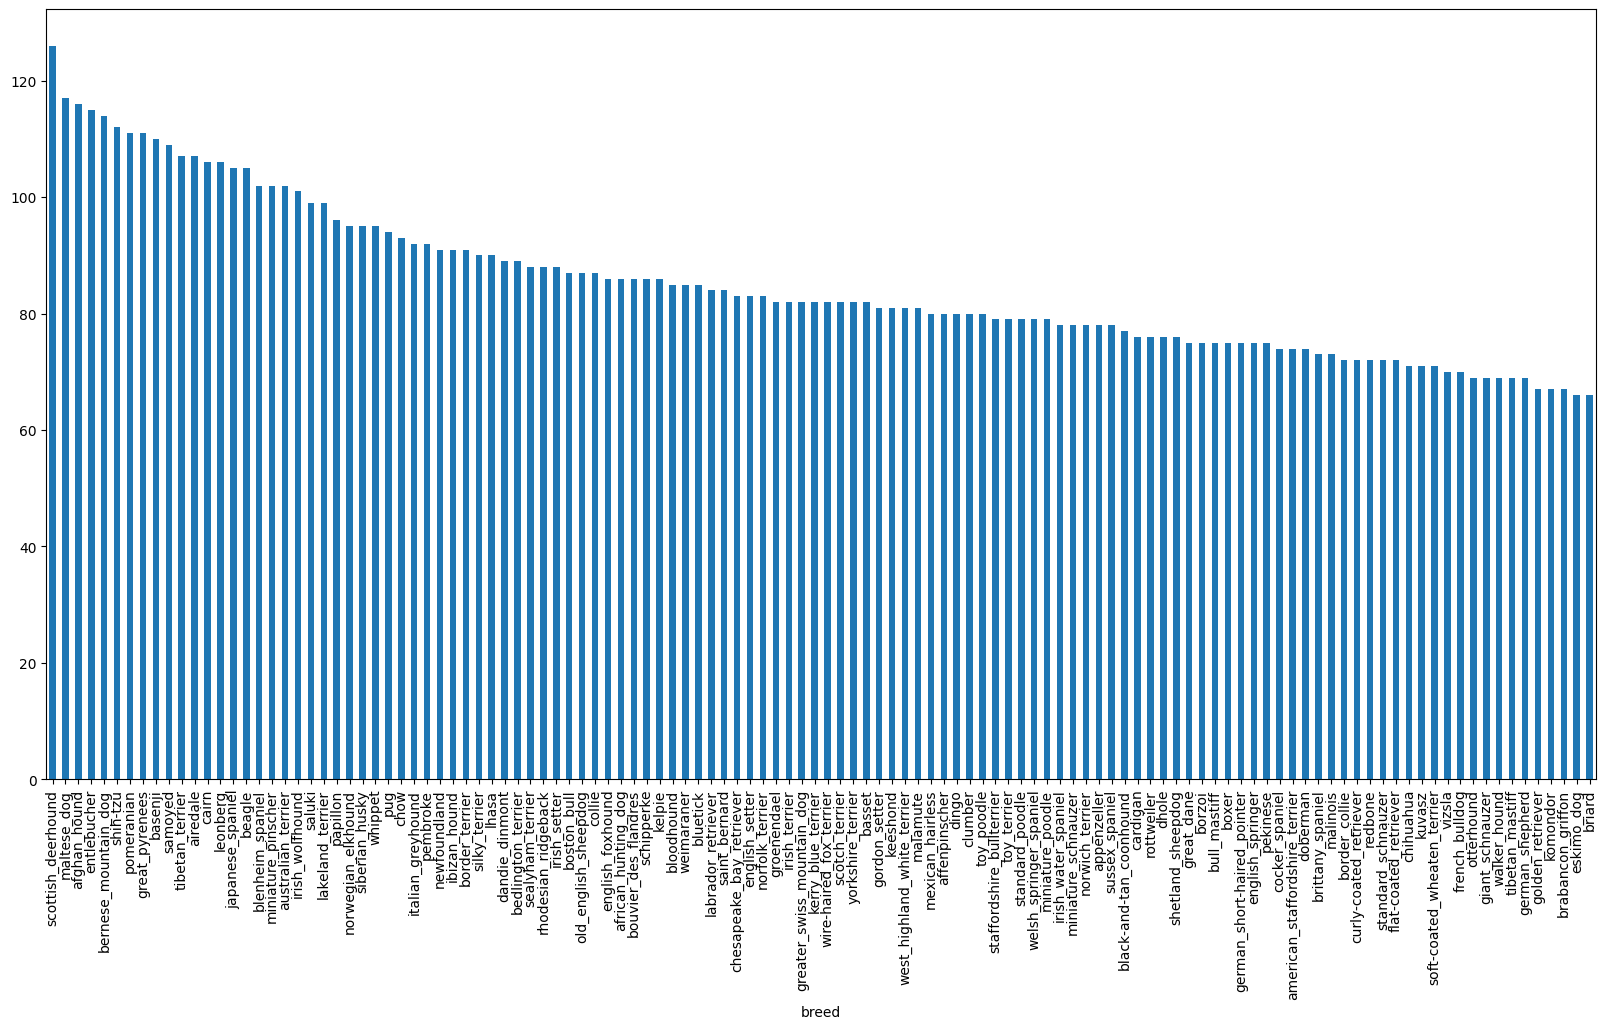

In [14]:
# How many images are there of each breads?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [16]:
labels_csv["breed"].value_counts().median() #better median

82.0

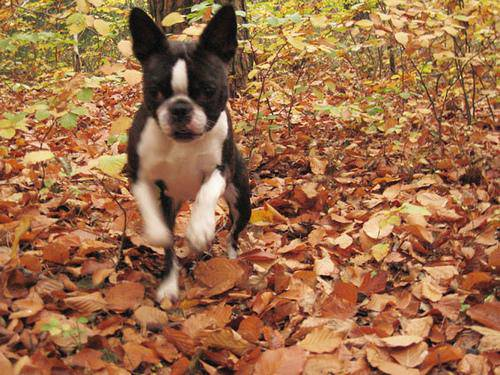

In [18]:
# View an image
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  74],
        [190, 138,  81],
        [192, 140,  82]]], dtype=uint8)
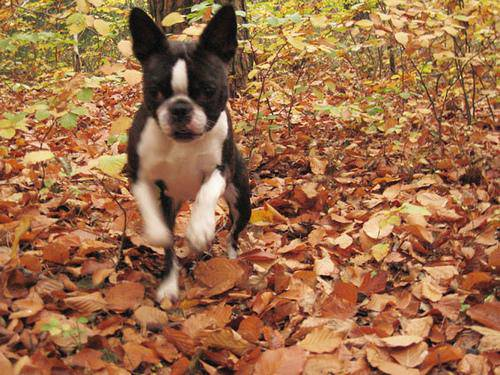

In [75]:
# Można też w matplotlib
from matplotlib.pyplot import imread

image = imread("drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")
image

### Getting images and their labels

In [33]:
#Create pathnames
filenames = ["drive/MyDrive/Dog Vision/train/" + id + ".jpg" for id in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [42]:
# Checking if numbers of filenames matches number of actual image file
import os

if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames): #os.listdir - dostep do wszystkich plikow
  print("Filenames match actual amount of files")

Filenames match actual amount of files


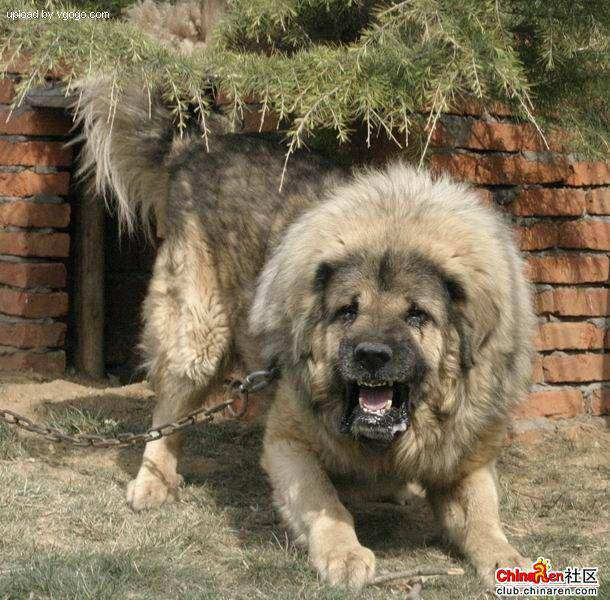

In [45]:
#one more check
Image(filenames[9000])

## Turning Data Labels into Numbers

In [50]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [51]:
len(labels)

10222

In [52]:
#Check if number of labels matches the numbers of filenames
if len(labels) == len(filenames):
  print("Yes")

Yes


In [56]:
# Find the unique labels
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [58]:
# Turn every label into an array of booleans
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [59]:
len(boolean_labels)

10222

In [63]:
# Example: Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0])) #index where labels occurs
print(boolean_labels[0].argmax()) #index where index occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [65]:
#Setup X and y
X = filenames
y = boolean_labels

## We going to start experimenting with ~1000 images and increase as needed

In [66]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 # @param {type:"slider", min:1000, max:10000, step:1000 }
# param możemy zmieniać sliderem z prawej strony

In [67]:
#Splittin into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42
                                                  )
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [68]:
# Leths have a geez at the traing data
X_train[:2], y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

## Preprocess Images - turning images into Tensors

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn out `image` into Tensors
4. Resize the `image` to be a shape of (224,224)
5. Return the modified `image`



In [77]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [79]:
print(image) # Values between 0 and 255 - RGB

[[[ 89 137  89]
  [ 76 124  76]
  [ 63 111  61]
  ...
  [ 77 133  86]
  [ 76 134  86]
  [ 76 134  86]]

 [[ 72 119  75]
  [ 67 114  68]
  [ 63 110  64]
  ...
  [ 75 131  84]
  [ 74 132  84]
  [ 74 132  84]]

 [[ 56 104  66]
  [ 58 106  68]
  [ 64 112  74]
  ...
  [ 71 127  82]
  [ 73 129  84]
  [ 74 130  85]]

 ...

 [[  2  11  10]
  [  5  14  11]
  [  8  14  14]
  ...
  [120 113  67]
  [126 118  71]
  [122 114  67]]

 [[  0   3   7]
  [  2   7  10]
  [  3   9   7]
  ...
  [105  98  54]
  [112 104  58]
  [111 103  57]]

 [[ 16  18  30]
  [ 16  19  24]
  [ 15  20  14]
  ...
  [101  92  51]
  [ 97  88  47]
  [120 111  70]]]


In [80]:
#Zmiana na Tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

## Function to preprocess all images

In [83]:
IMG_SIZE = 224

def process_image(image_path, img_size = IMG_SIZE):
  image = tf.io.read_file(image_path) #funkcja z tensor do wczytywania zdjęć
  #Turn into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, 3)
  #Convert the coulour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32) #Computin process more efficient
  #Resize the image(224,224)
  image = tf.image.resize(image, size = [img_size, img_size])
  return image

